In [2]:
import pandas as pd
import numpy as np
from tsa.preprocessing import get_sample_info, tpm_normalization
from tsa.gpr import gpr
from tsa.gene_selection import score_normalization, plot_scores, best_n_genes
from tsa.tsa import get_cost_matrix, best_alignment_graph, plot_alignment
from tsa.utils import list2floats, inference_timeseries
from tsa.plotting import plot_alignments

# GPR

In [15]:
# GPR input files
tpm_file = "data/GRCz11-TPM.tsv"
# template_samples_file = "data/white_stage_samples.tsv"
template_samples_file = "data/white_mpf_samples.tsv"

# variables
timepoints_per_sample = 10

# GPR output files
gpr_inference_file = "data/white_mpf_gpr.tsv"
gpr_scores_file = "data/white_mpf_score.tsv"

# gene selection
n_genes = 500
selected_genes_file = "data/white_genes.tsv"

####################################################

# preprocessing
template_samples = pd.read_csv(template_samples_file, sep="\t", index_col=0)
sample_order, time2samples = get_sample_info(template_samples)

tpms = pd.read_csv(tpm_file, sep="\t", index_col=0)
template_tpms = tpm_normalization(tpms, sample_order, minimum_value=5)

# filter genes BEFORE running GPR (optional)
selected_genes = list(pd.read_csv(selected_genes_file, sep="\t")["gene"])
template_tpms = template_tpms[template_tpms.index.isin(selected_genes)]

# GPR (slow)
extended_timepoints = list(np.round(np.linspace(min(time2samples), max(time2samples), 500), 2))
# extended_timepoints = inference_timeseries(list(time2samples), timepoints_per_sample)

Genes with TPM below 5: 11063 of 32212 (34.0%)


In [17]:
template_tpms_inf, gpr_scores = gpr(time2samples, template_tpms, extended_timepoints, plot=False, verbose=False, run_n=None)
# template_tpms_inf.to_csv(gpr_inference_file, sep="\t")
# gpr_scores.to_csv(gpr_scores_file, sep="\t")

# # gene selection (optional)
# gpr_normscores = score_normalization(gpr_scores)
# plot_scores(gpr_normscores, highlight_top_n=n_genes)
# # save selected genes
# selected_genes = best_n_genes(gpr_normscores, n_genes=n_genes, to_file=selected_genes_file)

In [18]:
extended_timepoints
template_tpms_inf

,0.00,14.43,28.86,43.29,57.72,72.14,86.57,101.00,115.43,129.86,...,7070.14,7084.57,7099.00,7113.43,7127.86,7142.28,7156.71,7171.14,7185.57,7200.00
gene,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000212,2.057579,1.976554,1.910843,1.934016,2.104046,2.132448,2.143763,2.132561,2.094920,2.029133,...,8.787493,8.785428,8.783353,8.781266,8.779169,8.777062,8.774943,8.772812,8.770671,8.768519
ENSDARG00000001870,1.554896,1.721865,1.852125,1.929085,1.952380,1.950952,1.950214,1.951607,1.956335,1.965257,...,8.422038,8.420997,8.419946,8.418885,8.417815,8.416736,8.415646,8.414547,8.413438,8.412320
ENSDARG00000002165,4.578609,4.733189,4.594732,4.235485,3.529108,3.390801,3.279635,3.203151,3.167207,3.175363,...,3.058626,3.056711,3.054789,3.052860,3.050924,3.048982,3.047032,3.045076,3.043112,3.041142
ENSDARG00000002193,1.353266,1.340063,1.246718,1.111013,0.903146,0.860865,0.822176,0.787630,0.757607,0.732341,...,9.829544,9.825523,9.821480,9.817418,9.813335,9.809235,9.805111,9.800967,9.796803,9.792618
ENSDARG00000002445,0.836980,1.009637,1.133710,1.160822,1.022762,0.980724,0.942930,0.912983,0.893765,0.887082,...,1.948881,1.948848,1.948810,1.948767,1.948720,1.948667,1.948610,1.948548,1.948481,1.948409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDARG00000115868,0.659894,1.028278,1.350028,1.473774,1.195961,1.092613,0.992352,0.903720,0.834147,0.789303,...,1.132668,1.132865,1.133059,1.133248,1.133433,1.133613,1.133789,1.133961,1.134129,1.134292
ENSDARG00000116570,1.900127,2.195466,2.382342,2.395827,2.114642,2.047390,1.999692,1.981601,2.002583,2.071112,...,0.029764,0.029633,0.029502,0.029371,0.029241,0.029110,0.028980,0.028851,0.028721,0.028592
ENSDARG00000116617,1.053917,1.187539,1.290312,1.336932,1.254681,1.206817,1.148502,1.080976,1.006288,0.927567,...,4.831267,4.829968,4.828664,4.827355,4.826042,4.824726,4.823405,4.822079,4.820749,4.819414


# TSA

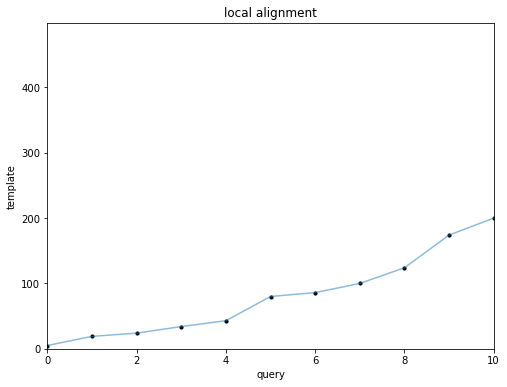

,original_time,inferred_time
0,120.0,72.14
1,360.0,274.15
2,480.0,346.29
3,720.0,490.58
4,960.0,620.44
5,1200.0,1154.31
6,1560.0,1240.88
7,1800.0,1442.89
8,2160.0,1789.18
9,2880.0,2510.62


In [19]:
# TSA input files
# tpm_file = "data/GRCz11-TPM.tsv"
# template_samples_file = "data/white_stage_samples.tsv"
# template_samples_file = "data/white_mpf_samples.tsv"
# gpr_inference_file = "data/white_stage_gpr.tsv"
# selected_genes_file = "data/white_stage_selected_genes.tsv"

# query_samples_file = "data/levin_stage_samples.tsv"
# query_samples_file = "data/white_stage_samples.tsv"
# query_samples_file = "data/marletaz_stage_samples.tsv"
# query_samples_file = "data/white_mpf_samples.tsv"
# query_samples_file = "data/levin_mpf_samples.tsv"
query_samples_file = "data/marletaz_mpf_samples.tsv"

# TSA output files
# alignment_file = "data/white_stage_levin_stage_mapping.tsv"
# alignment_file = "data/white_stage_white_stage_mapping.tsv"
# alignment_file = "data/white_stage_marletaz_stage_mapping.tsv"
# alignment_file = "data/white_mpf_white_mpf_mapping.tsv"
# alignment_file = "data/white_mpf_levin_mpf_mapping.tsv"
# alignment_file = "data/white_mpf_1000_white_mpf_mapping.tsv"
# alignment_file = "data/white_mpf_1000_levin_mpf_mapping.tsv"
alignment_file = "data/white_mpf_1000_marletaz_mpf_mapping.tsv"

####################################################

# preprocessing
query_samples = pd.read_csv(query_samples_file, sep="\t", index_col=0)
sample_order, time2samples = get_sample_info(query_samples)

tpms = pd.read_csv(tpm_file, sep="\t", index_col=0)
query_tpms = tpm_normalization(tpms, sample_order)

# cost matrix
# selected_genes = list(pd.read_csv(selected_genes_file, sep="\t")["gene"])
# template_tpms_inf = pd.read_csv(gpr_inference_file, sep="\t", index_col=0)
cost_matrix = get_cost_matrix(template_tpms_inf, query_tpms, selected_genes, time2samples)

# LTSA
best_path, best_score = best_alignment_graph(cost_matrix)
plot_alignment(cost_matrix, best_path)

# mapping
query_time = list2floats(query_samples.time.unique())
extended_template_time = list2floats(template_tpms_inf.columns)
mapped = pd.DataFrame(data={
    "original_time": query_time,
    "inferred_time": [extended_template_time[i] for i in best_path],
})
mapped

In [ ]:
mapped.to_csv(alignment_file, sep="\t", index=False)  # noqa

# Timeline

In [ ]:
# Timeline input files
# template_samples_file = "data/white_stage_samples.tsv"
# template_samples_file = "data/white_mpf_samples.tsv"
# gpr_inference_file = "data/white_mpf_gpr.tsv"

# alignment_files = {
#     "white": "data/white_stage_white_stage_mapping.tsv",
#     "levin": "data/white_stage_levin_stage_mapping.tsv",
#     "marletaz": "data/white_stage_marletaz_stage_mapping.tsv",
# }
# alignment_files = {
#     "white": "data/white_mpf_white_mpf_mapping.tsv",
#     "levin": "data/white_mpf_levin_mpf_mapping.tsv",
#     "marletaz": "data/white_mpf_marletaz_mpf_mapping.tsv",
# }
alignment_files = {
    "white": "data/white_mpf_1000_white_mpf_mapping.tsv",
    "levin": "data/white_mpf_1000_levin_mpf_mapping.tsv",
    "marletaz": "data/white_mpf_1000_marletaz_mpf_mapping.tsv",
}

####################################################

# x axis
# template_samples = pd.read_csv(template_samples_file, sep="\t", index_col=0)
# template_tpms_inf = pd.read_csv(gpr_inference_file, sep="\t", index_col=0)

template_time = list2floats(template_samples.time.unique())
extended_template_time = list2floats(template_tpms_inf.columns)
# extended_timepoints = inference_timeseries(template_time, timepoints_per_sample)
plot_alignments(template_time, extended_template_time, alignment_files)